# Implementation of Multilayer Perceptron from Scratch


In [1]:
import d2l
from mxnet import np, npx, gluon
npx.set_np()

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

Initialize model parameters

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))
b2 = np.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

Activation Function

In [3]:
def relu(X):
    return np.maximum(X, 0)

The model

In [4]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(np.dot(X, W1) + b1)
    return np.dot(H, W2) + b2

Training

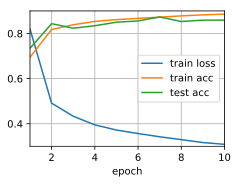

In [5]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()
num_epochs, lr = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, 
             lambda batch_size: d2l.sgd(params, lr, batch_size))

Predicting

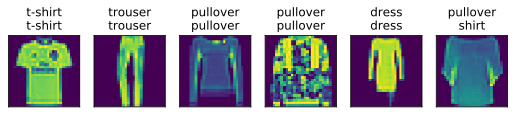

In [6]:
d2l.predict_ch3(net, test_iter)